# Contents

0. Overview
1. Imports
2. Data preprocessing
3. EDA
4. Data Preparation
5. Model
6. Train
7. Evaluation

# Overview

**Data** : The Simpsons Character Dataset is a collection of 21K images of 42 characters of the Simpsons show. A large part of the dataset is only a collection of 20 characters while the remaining 22 characters have a  combined total of only 2000 images. Hence only images concerning the top 20 characters of the dataset are chosen for this project. 

**Model** : The model architecture containts 7 blocks of layers. Each block has a one padding layer, followed by a batch normalization layer and about K Conv2d layers in each block for the Kth block. The model chosen is inspired by darknet architecture that is used by YOLO algorithm.  

**Accuracy** : The model performed excellent with an accuracy of 95%+ with a validation accuracy of 92%. The test accuracy was 95%. 


**Future Improvements**:
* What went right and what didn't:
Initially the FaceNet architecture was used as base layer and transfer learning was attempted. However, performance saturated at 60%. 
A simple architecture like the one described above worked well. 

* What can be tried next:
The layers have no skip connnections or regularization. It might be worth trying them out. Also, data augmentation was not implemented. 

# Log File:
- DATA: 20 labels,Augmentation - Zoom,shear, rotation all 0.2 : 
- Model:  inception-facenet baselayer(avg pool)+ 512, 512, 20sigmoid (softmax not working)
1. Run 1:
    * LR:0.1, momentum 0.3 - 10 epochs Train: loss = 2.2, accuracy =  .45, Test:??
2. Run 2:
    * Added Validation split of 0.1, 
    * LR:0.8, momentum 0.3 - 10 epochs Train: loss Didn't move below 2.8,acc below0.08
3. Run 3:
    * Added Validation split of 0.1, 
    * LR:0.2, momentum 0.3 - 10 epochs Train: loss :1.7, accuracy 0.5, Test : acc: 0.06
    * - Need to add regularization, overfitting train data I think?
4. Run 4:
- DATA: 20 labels,Augmentation - Zoom,shear, rotation all 0.2 : 
- Model:  inception-facenet baselayer(avg pool)+ 512, 512, 20 + regularization 0.0001 for bottom 3 layers
    * LR:0.2, momentum 0.3 - 10 epochs Train: loss :1.7, accuracy 0.35, Test : acc: 0.00??
    ? remove augmentation adn try?
5. Run 5: [ good ]
- Found reason for validation accuracy to be zero. Need to shuffle dataframe before validation split. 
- DATA: 20 labels,Augmentation None: Zoom,shear, rotation all set to 0 : 
- Model:  inception-facenet baselayer(avg pool)+ 512, 512, 20 + regularization 0.0001 for bottom 3 layers
    * LR:0.2, momentum 0.3 - 10 epochs Train: loss :2.3, accuracy 0.40, Test : acc: 0.40
    * LR:0.2, momentum 0.3 - 20 epochs Train: loss :2.0, accuracy 0.52?, Test : acc: 0.48?
 
Next steps:  try momentum = 0.8 and With augmentation ON
6. Run 6: [BAD]
- DATA: 20 labels,Augmentation None: Zoom,shear, rotation all set to 0 : 
- Model:  inception-facenet baselayer(avg pool)+ 512, 512, 20 + regularization 0.0001 for bottom 3 layers
    * LR:0.5, momentum 0.8 - 20 epochs Train: TOO SLOW
    * LR:0.5, momentum 0.5 - 20 epochs Train: Again too SLOW. Not sure if it's because of LR or Momentum
7. Run 7: [OK]
- DATA: 20 labels,Augmentation None: Zoom,shear, rotation all set to 0 : 
- Model:  inception-facenet baselayer(avg pool)+ 512, 512, 20 + regularization 0.0001 for bottom 3 layers
    * LR:0.2, momentum NIL - 40 epochs Train: 55, Test 55
    * LR:0.2, momentum NIL - 40+20 epochs Train: 60, Test 60
    * LR:0.2, momentum NIL - 40+20+40 epochs Train: 62, Test 62
    * Slows down after 25 epochs to be very slow change. May be change LR after some time?

8. Run 8: [OK]
- DATA: 20 labels,Augmentation None: Zoom,shear, rotation all set to 0 : 
- Model:  inception-facenet baselayer(avg pool)+ 512, 512, 20 + regularization 10e-4 for bottom 3 layers [NOTE THE 1/10 of L1 regulr] 
    * Added check point and Learing rate scheduler
    * LR:0.4 . Reloaded the 100 EPOCH's weights from the prev run 7. Acc: 60,60 after 10 epochs
    * reran from zero without loading weights, saturates at 60 % again. Try a different model arch. 

[DIFFERENT ARCHITECTURE ]

9. Run 9: [EXCELLENT]
- DATA: 20 labels,Augmentation None: Zoom,shear, rotation all set to 0 : 
- Model:  YOLO LIKE + 1k, 1k, 20 + NO regularization
    * LR 0.1, EPCH 40 Acc:  97, Valid: 92. 
    * Next run try epoh 20, FOR EARLY STOPPING
    
10. Run 10: [BEST]
- DATA: 20 labels,Augmentation None: Zoom,shear, rotation all set to 0 : 
- Model:  YOLOv1 LIKE + 1k, 1k, 20 + NO regularization
    * LR 0.1, EPCH 30 Acc:  95, Valid: 92. 
 

    

# **1. IMPORTS** 

In [1]:
# https://gist.github.com/jayspeidell/d10b84b8d3da52df723beacc5b15cb27
# https://medium.com/alex-attia-blog/the-simpsons-character-recognition-using-keras-d8e1796eae36
# https://github.com/Kaggle/kaggle-api
 
!pip install kaggle
# api_token = {"username":"USERNAME","key":"API_KEY"}
import json
import zipfile
import os

import numpy as np
import pandas as pd 
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vishnupraneeth","key":"fb37acec69bee7fb412dfba2971facf3"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# !kaggle competitions download -c 'cassava-leaf-disease-classification'
!kaggle datasets download 'alexattia/the-simpsons-characters-dataset'
!kaggle datasets download 'nikhil1011/facenet'

 99% 1.06G/1.08G [00:12<00:00, 101MB/s] 
100% 1.08G/1.08G [00:13<00:00, 88.9MB/s]
 99% 321M/324M [00:04<00:00, 71.2MB/s]
100% 324M/324M [00:04<00:00, 70.2MB/s]


In [5]:
for file in os.listdir():
  print(file)

.config
facenet.zip
the-simpsons-characters-dataset.zip
kaggle.json
sample_data


In [6]:

# Info on how to get your api key (kaggle.json) here: https://github.com/Kaggle/kaggle-api#api-credentials
# with open('/content/.kaggle/kaggle.json', 'w') as file:
#     json.dump(api_token, file)
# !chmod 600 /content/.kaggle/kaggle.json
# !kaggle config path -p /content
zip_1 = 'the-simpsons-characters-dataset.zip'
zip_2 = 'facenet.zip'

zip_ref = zipfile.ZipFile(zip_1, 'r')
zip_ref.extractall()
zip_ref = zipfile.ZipFile(zip_2, 'r')
zip_ref.extractall()
zip_ref.close()

# 2. Data PreProcessing

In [7]:
# Constants
DIR_TEST='./kaggle_simpson_testset/kaggle_simpson_testset/'
DIR_TRAIN='./simpsons_dataset/simpsons_dataset/'

IMG_SIZE = (200,200)
TOP_K = 20 # Select the TOP K characters based on the number of pictures of that character.

In [8]:
# Select Train Data
characters_all = {}
for x in os.listdir(DIR_TRAIN):
    characters_all[x]=len(os.listdir(os.path.join(DIR_TRAIN,x)))
characters_all={k: v for k, v in sorted(characters_all.items(), key=lambda item: item[1],reverse=True)}
characters_all = list(characters_all)
characters_all = characters_all
print(characters_all)

# Create dataframe

labels_name_int = {}
labels_int_name = {}
for i,character in enumerate(characters_all):
    labels_name_int[character] = int(i)
    labels_int_name[int(i)] = character

dataframe = pd.DataFrame(None,columns=['name','label'])

for char in characters_all:
    for filename in os.listdir(os.path.join(DIR_TRAIN,char)):
#         print(filename)
        dataframe=dataframe.append({'label':char,'name':os.path.join(DIR_TRAIN,char,filename)},ignore_index=True)
print(dataframe.groupby('label').count())

['homer_simpson', 'ned_flanders', 'moe_szyslak', 'lisa_simpson', 'bart_simpson', 'marge_simpson', 'krusty_the_clown', 'principal_skinner', 'charles_montgomery_burns', 'milhouse_van_houten', 'chief_wiggum', 'abraham_grampa_simpson', 'sideshow_bob', 'apu_nahasapeemapetilon', 'kent_brockman', 'comic_book_guy', 'edna_krabappel', 'nelson_muntz', 'lenny_leonard', 'mayor_quimby', 'waylon_smithers', 'maggie_simpson', 'groundskeeper_willie', 'barney_gumble', 'selma_bouvier', 'carl_carlson', 'ralph_wiggum', 'patty_bouvier', 'martin_prince', 'professor_john_frink', 'snake_jailbird', 'cletus_spuckler', 'rainier_wolfcastle', 'agnes_skinner', 'sideshow_mel', 'otto_mann', 'fat_tony', 'gil', 'miss_hoover', 'disco_stu', 'troy_mcclure', 'lionel_hutz']
                          name
label                         
abraham_grampa_simpson     913
agnes_skinner               42
apu_nahasapeemapetilon     623
barney_gumble              106
bart_simpson              1342
carl_carlson                98
charles_

In [9]:
# Select top 20 / top K higheest characters in the dataframe counts

top_k = TOP_K
if top_k!=42:
    df_count = dataframe.groupby('label').count()
    df_count_sorted = df_count.sort_values(by=['name'],ascending=False)
    names_selected = df_count_sorted[:top_k].index.values
    df_selected = pd.DataFrame([],columns=['name','label'])
    # print(df_selected)
    for i in range(len(names_selected)):
        df_each = dataframe[dataframe['label'] == names_selected[i]]
#     print(df_each)
        df_selected = df_selected.append(df_each,ignore_index=True)
else:
    df_selected = dataframe
df_selected.groupby('label').count()

,name
label,
abraham_grampa_simpson,913
apu_nahasapeemapetilon,623
bart_simpson,1342
charles_montgomery_burns,1193
chief_wiggum,986
comic_book_guy,469
edna_krabappel,457
homer_simpson,2246
kent_brockman,498


In [10]:
# Create a list of character names and their int labels:
class_names = df_selected.groupby('label').count()['name']
class_names = np.array(class_names.index.values)
class_names
label_integers=[]
for i in range(len(df_selected)):
    label_integers.append( np.where(class_names == df_selected.iloc[i]['label'])[0][0])
label_integers=np.array(label_integers)
label_integers = label_integers.astype(str)
print(label_integers)
label_integers_df = pd.DataFrame(label_integers,columns=['label_int'],dtype='string')
df_selected['label_int'] = label_integers_df
df_selected

['7' '7' '7' ... '13' '13' '13']


,name,label,label_int
0,./simpsons_dataset/simpsons_dataset/homer_simp...,homer_simpson,7
1,./simpsons_dataset/simpsons_dataset/homer_simp...,homer_simpson,7
2,./simpsons_dataset/simpsons_dataset/homer_simp...,homer_simpson,7
3,./simpsons_dataset/simpsons_dataset/homer_simp...,homer_simpson,7
4,./simpsons_dataset/simpsons_dataset/homer_simp...,homer_simpson,7
...,...,...,...
19543,./simpsons_dataset/simpsons_dataset/mayor_quim...,mayor_quimby,13
19544,./simpsons_dataset/simpsons_dataset/mayor_quim...,mayor_quimby,13
19545,./simpsons_dataset/simpsons_dataset/mayor_quim...,mayor_quimby,13
19546,./simpsons_dataset/simpsons_dataset/mayor_quim...,mayor_quimby,13


In [11]:
# Select Test Data
dataframe_test=[]
for file in os.listdir(DIR_TEST):
    for char in class_names:
        if file[0:len(char)]==char:
            dataframe_test.append([(os.path.join(DIR_TEST,file)),char])
dataframe_test = pd.DataFrame(dataframe_test,columns=['name','label'])
dataframe_test.groupby('label').count()

label_integers_test=[]

for i in range(len(dataframe_test)):
    label_integers_test.append( np.where(class_names == dataframe_test.iloc[i]['label'])[0][0])
label_integers_test=np.array(label_integers_test)
label_integers_test = label_integers_test.astype(str)
# print(label_integers_test)
label_integers_test_df = pd.DataFrame(label_integers_test,columns=['label_int'],dtype='string')
dataframe_test['label_int'] = label_integers_test_df
dataframe_test

,name,label,label_int
0,./kaggle_simpson_testset/kaggle_simpson_testse...,edna_krabappel,6
1,./kaggle_simpson_testset/kaggle_simpson_testse...,kent_brockman,8
2,./kaggle_simpson_testset/kaggle_simpson_testse...,kent_brockman,8
3,./kaggle_simpson_testset/kaggle_simpson_testse...,marge_simpson,12
4,./kaggle_simpson_testset/kaggle_simpson_testse...,homer_simpson,7
...,...,...,...
985,./kaggle_simpson_testset/kaggle_simpson_testse...,chief_wiggum,4
986,./kaggle_simpson_testset/kaggle_simpson_testse...,sideshow_bob,19
987,./kaggle_simpson_testset/kaggle_simpson_testse...,apu_nahasapeemapetilon,1
988,./kaggle_simpson_testset/kaggle_simpson_testse...,ned_flanders,16


# 3. EDA

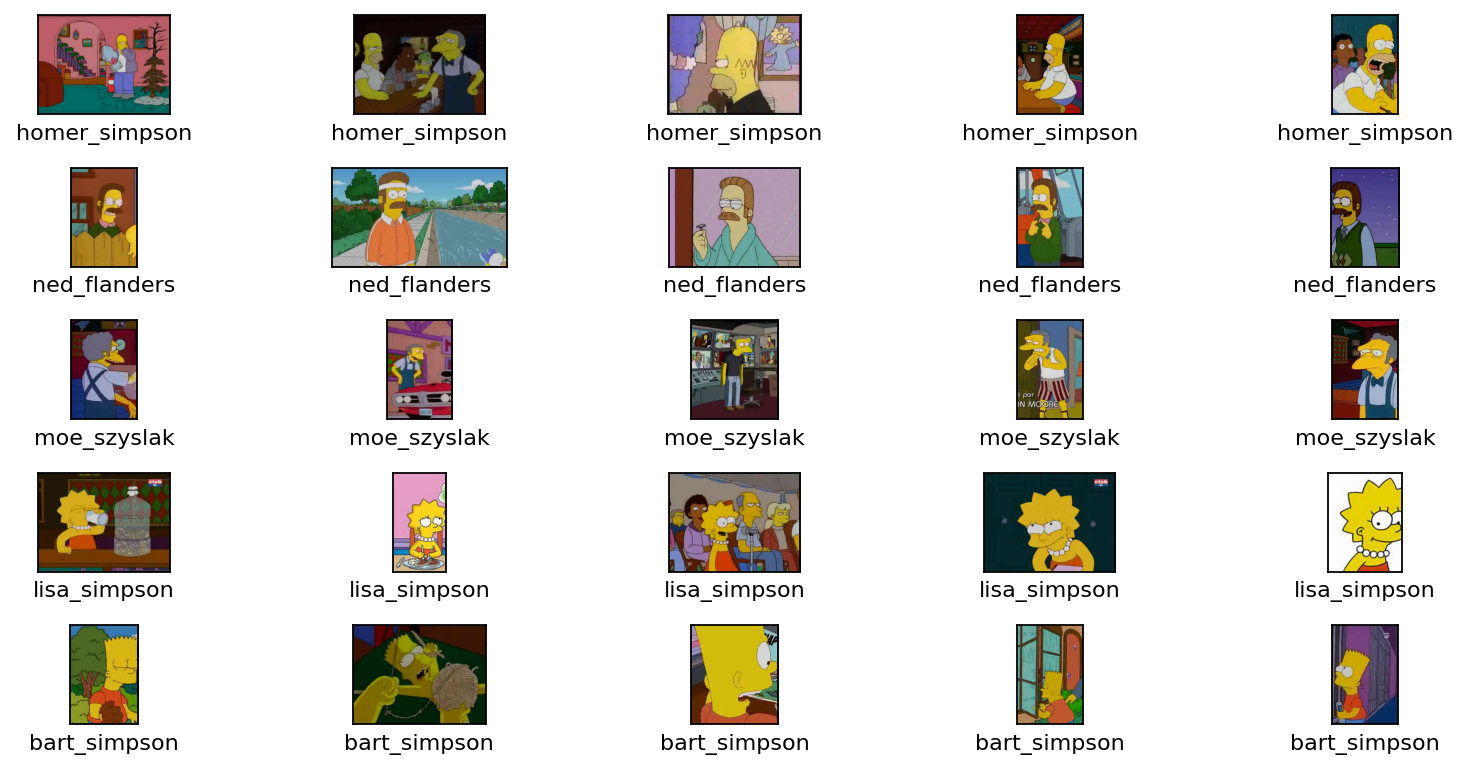

In [12]:
# Display Data
plt.figure( figsize=(10, 40), dpi=160 )

for i,character in enumerate(characters_all[0:5]):
    images=np.random.choice(os.listdir(DIR_TRAIN+character), 5)
#     print(images)
#     print(i,character)
    for j in range(len(images)):
        k=int(i)*5+j+1
        plt.subplot(len(characters_all),5,k)
        plt.tick_params(which='both', bottom=False, left=False, top=False,labelbottom=False,labelleft=False)
        img=plt.imread(os.path.join(DIR_TRAIN,character,images[j]))
        plt.xlabel(character)
        plt.imshow(img)
plt.tight_layout()

# 4. Data Preparation

In [13]:
# SHUFFLE data frame before validation split:
df_selected_shuffled = df_selected.sample(frac=1)
df_selected_shuffled = df_selected_shuffled.reset_index(drop=True)
df_selected_shuffled

,name,label,label_int
0,./simpsons_dataset/simpsons_dataset/nelson_mun...,nelson_muntz,17
1,./simpsons_dataset/simpsons_dataset/ned_flande...,ned_flanders,16
2,./simpsons_dataset/simpsons_dataset/milhouse_v...,milhouse_van_houten,14
3,./simpsons_dataset/simpsons_dataset/marge_simp...,marge_simpson,12
4,./simpsons_dataset/simpsons_dataset/homer_simp...,homer_simpson,7
...,...,...,...
19543,./simpsons_dataset/simpsons_dataset/apu_nahasa...,apu_nahasapeemapetilon,1
19544,./simpsons_dataset/simpsons_dataset/sideshow_b...,sideshow_bob,19
19545,./simpsons_dataset/simpsons_dataset/moe_szysla...,moe_szyslak,15
19546,./simpsons_dataset/simpsons_dataset/principal_...,principal_skinner,18


In [14]:
datagen_train = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0.0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
    horizontal_flip=True, vertical_flip=True, rescale=1./255,
    preprocessing_function=None, data_format=None, validation_split=0.1, dtype=None
)
datagen_train_flow = datagen_train.flow_from_dataframe(
    df_selected_shuffled, directory=None, x_col='name', y_col='label',
    weight_col=None, target_size=IMG_SIZE, color_mode='rgb',
    classes=None, class_mode='sparse', batch_size=32, shuffle=True,
    seed=None, save_to_dir=None, save_prefix='', interpolation='bilinear',
    validate_filenames=True,subset ='training'
)
datagen_valid_flow = datagen_train.flow_from_dataframe(
    df_selected_shuffled, directory=None, x_col='name', y_col='label',
    weight_col=None, target_size=IMG_SIZE, color_mode='rgb',
    classes=None, class_mode='sparse', shuffle=False,
    seed=None, save_to_dir=None, save_prefix='', interpolation='bilinear',
    subset ='validation'
)


Found 17594 validated image filenames belonging to 20 classes.
Found 1954 validated image filenames belonging to 20 classes.


# 5. Model

In [ ]:
# # Model

# from tensorflow.keras.models import load_model
# # load the model
# base_model = load_model('./keras-facenet/model/facenet_keras.h5')
# base_model.load_weights('./keras-facenet/weights/facenet_keras_weights.h5')

# base_model = tf.keras.Model(inputs=base_model.input,outputs=base_model.get_layer('AvgPool').output) 
# base_model.trainable=False
# base_model.summary()

# HYPER PARAMETER SPACE
* SGD :
* First 20 Epochs: LR 0.01, Momentum 0.3 - Accuracy of 65, loss = 1.2
* 

In [15]:
from tensorflow.keras import  models
face_model = tf.keras.Sequential([
                          tf.keras.Input(shape=(200,200,3)),
                          # BLOCK 1
                          tf.keras.layers.ZeroPadding2D(padding=(1,1)),
                          tf.keras.layers.BatchNormalization( axis=-1, momentum=0.9, epsilon=0.001),
                          tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,activation = 'relu'),
                          tf.keras.layers.MaxPool2D((2,2),strides=(2,2)),
                          # BLOCK 2
                          tf.keras.layers.ZeroPadding2D(padding=(1,1)),
                          tf.keras.layers.BatchNormalization( axis=-1, momentum=0.9, epsilon=0.001),
                          tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,activation = 'relu'),
                          tf.keras.layers.MaxPool2D((2,2),strides=(2,2)),
                          # BLOCK 3
                          tf.keras.layers.ZeroPadding2D(padding=(1,1)),
                          tf.keras.layers.BatchNormalization( axis=-1, momentum=0.9, epsilon=0.001),
                          tf.keras.layers.Conv2D(filters=128,kernel_size=3,strides=1,activation = 'relu'),
                          tf.keras.layers.Conv2D(filters=64,kernel_size=1,strides=1,activation = 'relu'),
                          tf.keras.layers.Conv2D(filters=128,kernel_size=3,strides=1,activation = 'relu'),
                          tf.keras.layers.MaxPool2D((2,2),strides=(2,2)),
                          # BLOCK 4
                          tf.keras.layers.ZeroPadding2D(padding=(1,1)),
                          tf.keras.layers.BatchNormalization( axis=-1, momentum=0.9, epsilon=0.001),
                          tf.keras.layers.Conv2D(filters=256,kernel_size=3,strides=1,activation = 'relu'),
                          tf.keras.layers.Conv2D(filters=128,kernel_size=1,strides=1,activation = 'relu'),
                          tf.keras.layers.Conv2D(filters=256,kernel_size=3,strides=1,activation = 'relu'),
                          tf.keras.layers.MaxPool2D((2,2),strides=(2,2)),
                          
                          # BLOCK 5
                          tf.keras.layers.ZeroPadding2D(padding=(1,1)),
                          tf.keras.layers.BatchNormalization( axis=-1, momentum=0.9, epsilon=0.001),
                          tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=1,activation = 'relu'),
                          tf.keras.layers.Conv2D(filters=256,kernel_size=1,strides=1,activation = 'relu'),
                          tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=1,activation = 'relu'),
                          tf.keras.layers.Conv2D(filters=256,kernel_size=1,strides=1,activation = 'relu'),
                          tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=1,activation = 'relu'),

                          # BLOCK 6
                          tf.keras.layers.ZeroPadding2D(padding=(1,1)),
                          tf.keras.layers.BatchNormalization( axis=-1, momentum=0.9, epsilon=0.001),
                          tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=1,activation = 'relu'),
                          tf.keras.layers.Conv2D(filters=256,kernel_size=1,strides=1,activation = 'relu'),
                          tf.keras.layers.Conv2D(filters=512,kernel_size=3,strides=1,activation = 'relu'),
                          tf.keras.layers.MaxPool2D((2,2),strides=(2,2)),
                          tf.keras.layers.Flatten(),
                          
                          # BLOCK 7
                          tf.keras.layers.Dense(1000,activation = 'relu'),
                          tf.keras.layers.Dense(1000,activation = 'relu'),
                          tf.keras.layers.Dense(20,activation = 'softmax'),
                             ])

opt = tf.keras.optimizers.SGD(learning_rate = 0.1)
face_model.compile( optimizer=opt, loss='SparseCategoricalCrossentropy', metrics='accuracy')
face_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 202, 202, 3)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 202, 202, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 102, 102, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 102, 102, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      1

In [ ]:
# face_model = tf.keras.Sequential([
#     base_model,
#     tf.keras.layers.Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.L1(0.00001)),
#     tf.keras.layers.Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.L1(0.00001)),
#     tf.keras.layers.Dense(20,activation='softmax',kernel_regularizer=tf.keras.regularizers.L1(0.00001)),
# ])
# opt = tf.keras.optimizers.SGD(learning_rate = 0.4)
# face_model.compile( optimizer=opt, loss='SparseCategoricalCrossentropy', metrics='accuracy')
# face_model.summary()

# 6.Training 

In [47]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "checkpoints/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5*550)

In [ ]:
# def scheduler(epoch, lr):
#   if epoch  < 20:
#     lr = 0.2 
#   elif epoch  < 30:
#     lr = 0.3 
#   elif epoch  < 40:
#     lr = 0.05 
#   elif epoch  < 50:
#     lr = 0.025  
#   return lr

# callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
# from keras.callbacks import Callback
# class WeightsSaver(Callback):
#     def __init__(self, N):
#         self.N = N
#         self.epoch = 0

#     def on_epoch_end(self, epoch, logs={}):
#         if self.epoch % self.N == 0:
#             name = 'weights%08d.h5' % self.epoch
#             self.model.save_weights(name)
#             self.epoch += 1

In [49]:
# face_model = load_model('./face_model_40EPOCH.h5')
# face_model.load_weights('./face_model_weights_40EPOCH.h5')

In [16]:
history = face_model.fit(
    datagen_train_flow, epochs=30, verbose=1, #callbacks=[cp_callback],
    validation_data=datagen_valid_flow , validation_steps=None, class_weight=None, use_multiprocessing=False, batch_size =32,
    shuffle=True 
)

Epoch 1/30
550/550 [==============================] - 108s 181ms/step - loss: 2.7304 - accuracy: 0.1736 - val_loss: 2.7100 - val_accuracy: 0.1934
Epoch 2/30
550/550 [==============================] - 97s 177ms/step - loss: 2.0106 - accuracy: 0.3809 - val_loss: 2.1313 - val_accuracy: 0.4309
Epoch 3/30
550/550 [==============================] - 97s 177ms/step - loss: 1.5163 - accuracy: 0.5337 - val_loss: 1.6706 - val_accuracy: 0.5113
Epoch 4/30
550/550 [==============================] - 98s 177ms/step - loss: 1.1981 - accuracy: 0.6353 - val_loss: 1.2143 - val_accuracy: 0.6402
Epoch 5/30
550/550 [==============================] - 98s 177ms/step - loss: 0.9889 - accuracy: 0.7040 - val_loss: 1.0960 - val_accuracy: 0.6704
Epoch 6/30
550/550 [==============================] - 97s 176ms/step - loss: 0.8307 - accuracy: 0.7554 - val_loss: 0.9346 - val_accuracy: 0.7405
Epoch 7/30
550/550 [==============================] - 97s 176ms/step - loss: 0.7419 - accuracy: 0.7889 - val_loss: 0.6268 - val_a

In [104]:
face_model.save('./face_model_RUN10.h5')
face_model.save_weights('./face_model_weights_RUN10.h5')

# 7. Evaluation

In [45]:
history.history['epoch']

KeyError: ignored

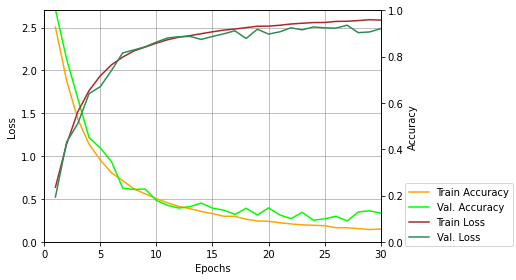

In [103]:
f = plt.figure()
x=range(1,31)
ax = plt.gca()
ax2 = ax.twinx()
ax.set_ylim([0,2.7])
ax.plot(x,history.history['loss'],color='orange')
ax.plot(x,history.history['val_loss'],color='lime')
ax.set_ylabel('Loss')

ax2.plot(x,history.history['accuracy'],color='brown')
ax2.plot(x,history.history['val_accuracy'],color='seagreen')
ax2.set_ylim([0,1])
ax2.set_xlim([0,30])

ax.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax.grid(color='grey', linestyle='-', linewidth=0.5)
f.legend(['Train Accuracy','Val. Accuracy','Train Loss','Val. Loss'],loc=4,bbox_to_anchor=(1.2, 0.1))
f.tight_layout()

In [ ]:
face_model = load_model('./face_model_RUN10.h5')
face_model.load_weights('./face_model_weights_RUN10.h5')

In [18]:
datagen_test = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
    horizontal_flip=False, vertical_flip=False, rescale=1./255,
    preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None
)
datagen_test_flow = datagen_test.flow_from_dataframe(
    dataframe_test, directory=None, x_col='name', y_col='label',
    weight_col=None, target_size=IMG_SIZE, color_mode='rgb',
    classes=None, class_mode='sparse', shuffle=False,
    seed=None, save_to_dir=None, save_prefix='',subset=None, interpolation='nearest',
    validate_filenames=True
)

Found 990 validated image filenames belonging to 20 classes.


In [30]:
prediction=np.argmax(face_model.predict(datagen_test_flow),axis=1)
y=np.array(dataframe_test['label'])
true_label=[]
for char in y:
    true_label.append(datagen_test_flow.class_indices[char])

In [31]:
face_model.evaluate(datagen_test_flow)

31/31 [==============================] - 1s 45ms/step - loss: 0.1668 - accuracy: 0.9495


[0.16678369045257568, 0.9494949579238892]

In [ ]:
test_cm = confusion_matrix(true_label, prediction)
test_cr = classification_report(true_label, prediction)
print('Confusion Matrix', test_cm)
print('Classification Report', test_cr)

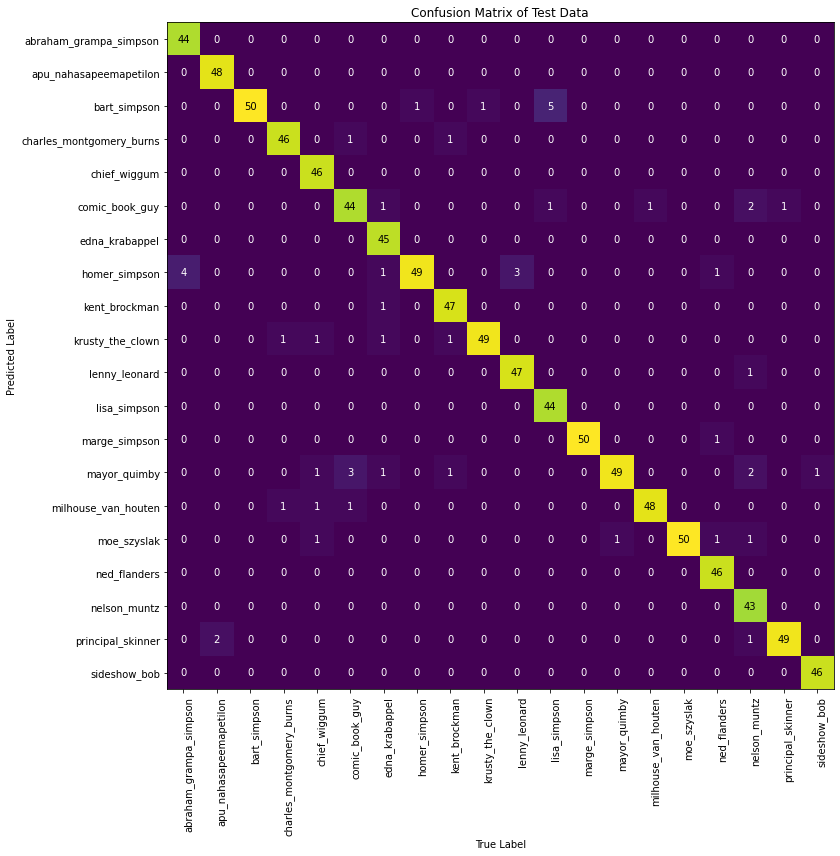

In [39]:
#Display Confusion Matrix
f = test_cm.transpose()

fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(f)
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i==j:
          text = ax.text(j, i, f[i, j],
                       ha="center", va="center", color="k")
        else:
          text = ax.text(j, i, f[i, j],
                       ha="center", va="center", color="w")

plt.xlabel('True Label')
plt.ylabel('Predicted Label')

ax.set_title("Confusion Matrix of Test Data")
fig.tight_layout()
plt.show()